In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Show plots in notebook
%matplotlib inline


In [18]:
# For reproducibility
np.random.seed(42)

n = 21000  # Number of properties

cities = ["Mexico City", "Guadalajara", "Monterrey", "Puebla", "Tijuana"]

df = pd.DataFrame({
    "price": np.random.randint(30000, 500000, n),
    "surface_total_m2": np.random.randint(30, 400, n),
    "city": np.random.choice(cities, n),
    "lat": np.random.uniform(14.5, 32.7, n),
    "lon": np.random.uniform(-118.5, -86.7, n)
})

df.head()


,price,surface_total_m2,city,lat,lon
0,151958,303,Puebla,22.982831,-93.134036
1,176867,50,Monterrey,28.630167,-106.090898
2,161932,304,Puebla,17.335355,-99.148377
3,395838,289,Mexico City,30.523681,-106.918865
4,289178,362,Puebla,24.856847,-86.828431


In [19]:
df.to_csv("mexico_housing.csv", index=False)


In [20]:
df_csv = pd.read_csv("mexico_housing.csv")
df_csv.head()
df_csv.info()
df_csv.describe()
df_csv.isna().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             21000 non-null  int64  
 1   surface_total_m2  21000 non-null  int64  
 2   city              21000 non-null  object 
 3   lat               21000 non-null  float64
 4   lon               21000 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 820.4+ KB


price               0
surface_total_m2    0
city                0
lat                 0
lon                 0
dtype: int64

In [21]:
# Remove top 1% of prices
df_csv = df_csv[df_csv["price"] <= df_csv["price"].quantile(0.99)]

# Remove top 1% of property sizes
df_csv = df_csv[df_csv["surface_total_m2"] <= df_csv["surface_total_m2"].quantile(0.99)]

df_csv.shape  # Check rows remaining (~20,617)


(20617, 5)

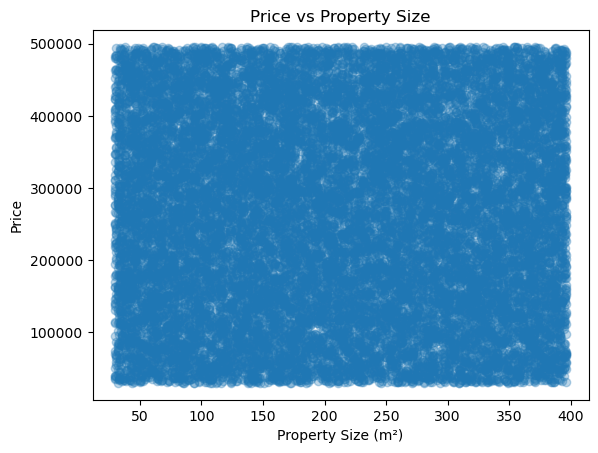

np.float64(0.005506270405311331)

In [22]:
plt.figure()
plt.scatter(df_csv["surface_total_m2"], df_csv["price"], alpha=0.3)
plt.xlabel("Property Size (m²)")
plt.ylabel("Price")
plt.title("Price vs Property Size")
plt.show()

# Correlation
corr_size = df_csv["price"].corr(df_csv["surface_total_m2"])
corr_size


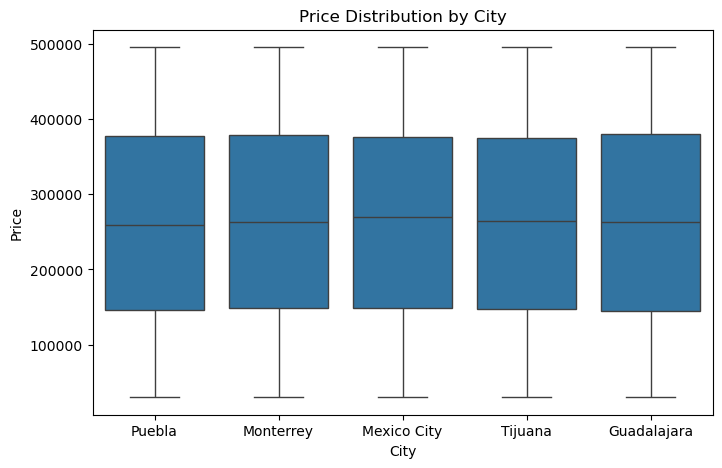

In [23]:
top_cities = df_csv["city"].value_counts().head(5).index
city_df = df_csv[df_csv["city"].isin(top_cities)]

plt.figure(figsize=(8,5))
sns.boxplot(x="city", y="price", data=city_df)
plt.title("Price Distribution by City")
plt.xlabel("City")
plt.ylabel("Price")
plt.show()


In [24]:
df_csv[["price", "lat", "lon"]].corr()


,price,lat,lon
price,1.000000,0.004073,0.012060
lat,0.004073,1.000000,-0.015218
lon,0.012060,-0.015218,1.000000
